# Ease of Disaster / Incident Avoidance as a Metric

Our group decided to use disaster/incident avoidance as its metric for determining which neighborhood is the best. We split this metric across three datasets: Fire Incidents, Speed Humps, and Water Toxins. We can use these to determine which neighbor hood is the best to avoid this kinds of issues.

We initially were going to look at flood data and landslide data, but the datasets were not helpful in determining which neighborhoods were better than others, either because too many lacked data, or the granularity of the data was too large.

Here we just import common libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Fire Incidents

WPRDC offers a dataset containing data for fire incidents responded to by the Pittsburgh Bureau of Fire
(https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh). By leveraging this dataset, we can determine which neighborhoods have the least amount of fire incidents, making sure we are less vulnerable to fire spreading to our lovely home (because house fires only happen to *other* people).

First we load our dataset.

In [2]:
# Dataset on fire incidents.
fires = pd.read_csv('https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02')

Let's take a peek at what we're looking at!

In [3]:
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


First thing we have to do is clean the data. There are some rows that have no data for the neighborhood column, which is the most important one for us. So, let's get rid of those useless rows.

In [4]:
fires = fires.dropna(subset=['neighborhood'], ignore_index=True)
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
1,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
2,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
3,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
4,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240


Upon looking at other columns, `type_description` seems like it may be of some use. There may be small, contained fires that aren't really a threat to our house. Let's take a look and see what types of fires are listed and reported.

In [5]:
fires.groupby('type_description')['type_description'].count().sort_values(ascending=False)

type_description
Cooking fire, confined to container                   1952
Building fire                                         1825
Passenger vehicle fire                                 918
Outside rubbish, trash or waste fire                   712
Brush or brush-and-grass mixture fire                  517
Outside rubbish fire, Other                            511
Dumpster or other outside trash receptacle fire        415
Trash or rubbish fire, contained                       397
Natural vegetation fire, Other                         247
Special outside fire, Other                            216
Mobile property (vehicle) fire, Other                  173
Fire, Other                                            143
Fires in structure other than in a building            136
Grass fire                                             120
Outside equipment fire                                  67
Fuel burner/boiler malfunction, fire confined           55
Chimney or flue fire, confined to chimn

It does seem that there are some fires we shouldn't really care about, to simplicity, we can just remove all the fires with "confined" in the description.

In [6]:
fires = fires[~fires['type_description'].str.contains('confined')]
fires = fires.reset_index()

Because Pittsburgh is included in the address, lets just make sure that it is included in every address, and we can see that 8 addresses were removed due to not being in Pittsburgh. 

In [7]:
print('Before address removal', len(fires))
fires = fires[fires['address'].str.contains('PITTSBURGH')]
fires = fires.reset_index()
print('After address removal', len(fires))

Before address removal 6595
After address removal 6587


Finally, let's look at the data for fire incidents per neighborhood. We can visualize this as a bar chart of the ten safest neighborhoods.

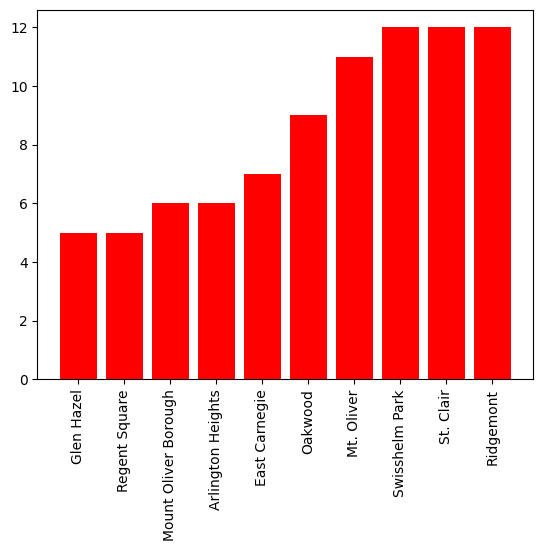

In [8]:
neighborhood_incidents = fires.groupby('neighborhood')['neighborhood'].count().sort_values()
selection = neighborhood_incidents[:10]
plt.bar(selection.index, selection, color='red')
plt.xticks(rotation=90)
plt.show()

We can see here that the safest neighborhoods from fire are
1. Glen Hazel (5)
2. Regent Square (5)
3. Mount Oliver Borough (6)
4. Arlington Heights (6)
5. East Carnegie (7)

## Speed Humps

The Pittsburgh speed hump location dataset can give us information about the amount of speed humps in each neighborhood. This information can be used to figure out which neighborhood is best for avoiding natural disasters. This is because the more speed humps in a area means traffic flows more slowly, thus making it harder to escape natural disasters.  

### Analysis of the speed humps dataset 

We first start by loading the dataset and getting everything set up for data analysis. 

In [9]:
humps = pd.read_csv("https://data.wprdc.org/datastore/dump/37b2ac41-ae8e-4de1-8405-157e05dc3640")

After loading and getting everything set up, let's take a glance at what we're working with 

In [10]:
humps.head(5)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


This dataset provides a lot of information and has a lot of column that we don't really need to know about. Let's sort this by neighborhood and how many humps there are in each neighborhood. 

In [11]:
humps_count  = humps.groupby('neighborhood')['hump_id'].count().reset_index()
print(humps_count) 

           neighborhood  hump_id
0            Bloomfield        3
1             Brookline        4
2               Carrick        9
3       Central Oakland        1
4              Garfield        3
5         Highland Park        2
6        Homewood South        4
7      Mount Washington        3
8         North Oakland        6
9             Overbrook        1
10          Perry North        4
11          Polish Hill        6
12     South Side Flats        3
13    South Side Slopes        4
14  Squirrel Hill North        3
15  Squirrel Hill South       18
16      Stanton Heights        1
17           Upper Hill        4


Okay good, now this is data that is more specific to what we need. Let's change the name of hump_id to count and orangize it to better reflect what it represents now. 


In [12]:
humps_count = humps_count.rename(columns={'hump_id': 'count'}) 
humps_count = humps_count.sort_values(by='count', ascending=True)

print(humps_count)

           neighborhood  count
3       Central Oakland      1
16      Stanton Heights      1
9             Overbrook      1
5         Highland Park      2
0            Bloomfield      3
14  Squirrel Hill North      3
4              Garfield      3
12     South Side Flats      3
7      Mount Washington      3
13    South Side Slopes      4
17           Upper Hill      4
6        Homewood South      4
1             Brookline      4
10          Perry North      4
11          Polish Hill      6
8         North Oakland      6
2               Carrick      9
15  Squirrel Hill South     18


Let's visualize this on a bar graph. 

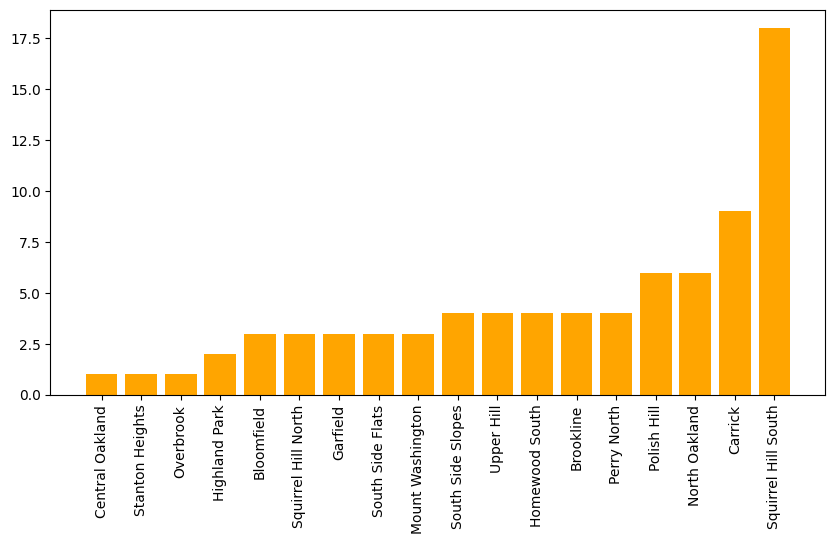

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(humps_count['neighborhood'], humps_count['count'], color='orange')
plt.xticks(rotation=90)
plt.show() 

##  Conclusion 


As we can see from the graph, the top 5 neighbhorhood with the lowest amount of speed humps are the following: 
1. Overbrook (1)
2. Central Oakland (1)
3. Stantion heights (1) 
4. Highland Park (2)
5. Garfield (3)

# Water Toxin Releases in Pittsburgh

The WPRDC Toxic Releases in water provides a dataset that lets you see the total release of chemicals per lb into the water by different facilities. This information allows you to determine what neighborhoods has cleanest water with the least pollutants. It also helps you identify the neighborhoods with high amounts of toxic releases, making sure you avoid drinking water from them. 

Start by reading in the data 

In [14]:
watertoxdata = pd.read_csv("https://data.wprdc.org/datastore/dump/c9baaa77-2dc5-494c-a2ce-f90db9106df2")

Dataset is for Alleghany County, so we first sort out everything besides the city of Pittsburgh. We also sort out all the columns that are relevant. 

In [15]:
filtered_data = watertoxdata[watertoxdata['CITY_NAME'].str.contains('PITTSBURGH', case=False, na=False)]
columns_to_display = ['FACILITY_NAME', 'STREET_ADDRESS',  'CITY_NAME', 'ZIP_CODE', 'CHEM_NAME', 'CARCINOGEN', 'CLEAN_AIR', 'TOTAL_RELEASE']
filtered_data[columns_to_display].head()

,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,ZIP_CODE,CHEM_NAME,CARCINOGEN,CLEAN_AIR,TOTAL_RELEASE
0,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,15204,Xylene (mixed isomers),N,Y,NaN
3,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Methyl ethyl ketone,N,N,NaN
4,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Methanol,N,Y,NaN
5,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,"1,2,4-Trimethylbenzene",N,N,NaN
6,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Toluene,N,Y,NaN


Here we sort the data and figure out the zip code with the highest total release of chemicals (per lb) into the water. The majority is from facilities in 15225 which encompasses the Neville Township. We also remove any rows that have a null total release value. A few zip codes that are identical but have extensions are also removed. 

In [16]:
filtered_data = filtered_data.dropna(subset=['TOTAL_RELEASE'])

filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152251516]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152042599]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152206246]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152342624]


filtered_data = filtered_data.sort_values(by='TOTAL_RELEASE', ascending=False)
filtered_data[columns_to_display].head()


,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,ZIP_CODE,CHEM_NAME,CARCINOGEN,CLEAN_AIR,TOTAL_RELEASE
10330,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,197243.0
13890,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,160995.0
8662,LTV STEEL COMPANY INC PITTSBURGH WORKS,4650 SECOND AVENUE,PITTSBURGH,15207,Ammonia,N,N,150000.0
13488,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,132370.0
12201,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,92000.0


We group together the total releases of each zipcode to make the data more centralized. 

In [17]:
zip_code_totals = filtered_data.groupby('ZIP_CODE')['TOTAL_RELEASE'].sum()

We find the zip codes with the most total releases (worst ones to live at)

In [18]:
worst_zip_codes = zip_code_totals.sort_values(ascending=False).head(5)
worst_zip_codes

ZIP_CODE
15225    1542450.60
15207     771586.00
15201     139734.71
15236         48.00
15226         21.00
Name: TOTAL_RELEASE, dtype: float64

Here the zipcodes we replace the zipcodes with neighborhoods. The second line of code converts the keys in the zip_to_name dictionary to integers and keeps the corresponding values the same. This is needed as the zip codes cannot be used as an index without being integers.  

In [19]:
zip_to_name = {
    '15525': "Neville",
    '15207': 'Greenfield, New Homestead, Lincoln Place, Glen Hazel, Hazelwood, Hays',
    '15201': 'Central Lawrenceville, Lower Lawrenceville, Upper Lawrenceville, Stanton Heights, Polish Hill',
    '15236': 'Pleasant HIlls, South Park, Whitehall, Baldwin',
    '15226': 'Brookline, Overbrook, Beechview, Bon Air, Baldwin'
}

zip_to_name = {int(i): v for i, v in zip_to_name.items()}

worst_neighborhoods = worst_zip_codes.rename(index=zip_to_name)

worst_neighborhoods

ZIP_CODE
15225                                                                                            1542450.60
Greenfield, New Homestead, Lincoln Place, Glen Hazel, Hazelwood, Hays                             771586.00
Central Lawrenceville, Lower Lawrenceville, Upper Lawrenceville, Stanton Heights, Polish Hill     139734.71
Pleasant HIlls, South Park, Whitehall, Baldwin                                                        48.00
Brookline, Overbrook, Beechview, Bon Air, Baldwin                                                     21.00
Name: TOTAL_RELEASE, dtype: float64

Now these are the best zipcodes with no releases into the water at all. 

In [137]:
top_zip_codes = zip_code_totals.sort_values(ascending=True).head(5)
top_zip_codes

ZIP_CODE
15204     0.0
15219     0.0
15233     0.0
15275     0.0
15226    21.0
Name: TOTAL_RELEASE, dtype: float64

Here we display them as neighboorhoods. 

In [140]:
zip_name = {
    '15204': 'Crafton Heights, Windgap, Chartiers, Sheraden, Esplen',
    '15219': 'Market Square, Cultural District, The Point, West Oakland, Crawford-Roberts',
    '15233': 'Central Northside, Marshall-Shadeland, Allegheny West, Manchester',
    '15275': 'North Fayette',
    '15226': 'Brookline, Overbrook, Beechview, Bon Air, Baldwin'
}

zip_name = {int(i): v for i, v in zip_name.items()}
top_neighborhoods = top_zip_codes.rename(index=zip_name)
top_neighborhoods

ZIP_CODE
Crafton Heights, Windgap, Chartiers, Sheraden, Esplen                           0.0
Market Square, Cultural District, The Point, West Oakland, Crawford-Roberts     0.0
Central Northside, Marshall-Shadeland, Allegheny West, Manchester               0.0
North Fayette                                                                   0.0
Brookline, Overbrook, Beechview, Bon Air, Baldwin                              21.0
Name: TOTAL_RELEASE, dtype: float64

This is the data visualized for most waste and least released toxins (Displayed as zipcodes to read easier)

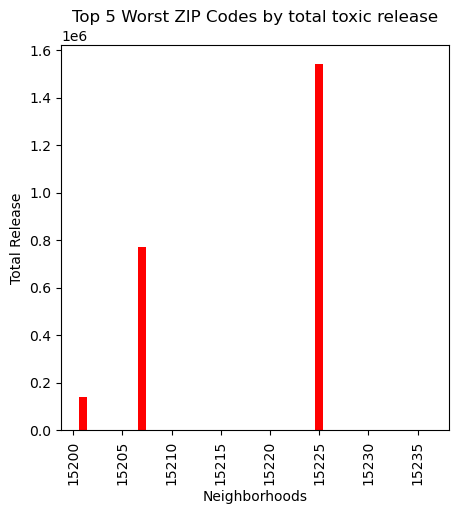

In [177]:
plt.figure(figsize=(5, 5))
plt.bar(worst_zip_codes.index, worst_zip_codes.values, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Total Release')
plt.title('Top 5 Worst ZIP Codes by total toxic release')
plt.show() 


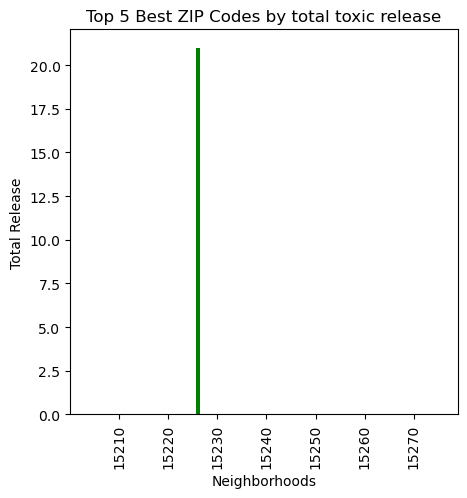

In [181]:
plt.figure(figsize=(5, 5))
plt.bar(top_zip_codes.index, top_zip_codes.values, color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Total Release')
plt.title('Top 5 Best ZIP Codes by total toxic release')
plt.show() 


# Conclusion

There are a couple of neighborhoods with zero toxic releases into the water so we're displaying them as zipcodes

1. 15204 (0)
2. 15219 (0)
3. 15233 (0)
4. 15275 (0)
5. 15226 (21)

# Combining The Metrics

Because the water toxins dataset is grouped by zip code, simply doing a weighted merge of the dataframes becomes difficult. Luckily for us, water toxins levels are 0 in many top neighborhoods, so we can say for sure that our top neighborhood will have 0 pounds of toxins dumped into the water. We can start with these neighborhoods.

In [41]:
no_toxins = [
    'Crafton Heights',
    'Windgap',
    'Chartiers',
    'Sheraden',
    'Esplen',
    'Market Square',
    'Cultural District',
    'The Point',
    'West Oakland',
    'Crawford-Roberts',
    'Central Northside',
    'Marshall-Shadeland',
    'Allegheny West',
    'Manchester',
    'North Fayette',
]
no_toxins = pd.Series([0] * len(no_toxins), index=no_toxins)
metrics = pd.concat([no_toxins, neighborhood_incidents, humps_count.set_index('neighborhood')], axis=1)
metrics.columns = ['toxicity', 'fires', 'humps']
metrics

,toxicity,fires,humps
Crafton Heights,0.0,55.0,NaN
Windgap,0.0,21.0,NaN
Chartiers,0.0,NaN,NaN
Sheraden,0.0,137.0,NaN
Esplen,0.0,21.0,NaN
...,...,...,...
Mount Washington,NaN,195.0,3.0
Hazelwood,NaN,206.0,NaN
South Side Flats,NaN,216.0,3.0
Central Business District,NaN,221.0,NaN


Due to low amounts of data, we can concede that missing data from the humps dataset indicates 0 speed humps, as we have all the speed hump ids in the dataset.

In [45]:
metrics['humps'] = metrics['humps'].fillna(0)
metrics = metrics.dropna()

Because we only have data where the water toxin level is 0, we effectively already calculated it as part of the evaluation. Because fires are dangerous, they deserve more attention than speed humps, however, since speed humps are likely on important roads and fires can be far away, they should be elevated too. We ultimately decide to simply add the metrics since fires are so numerous but often remote and a single speedbump slows everyone down, which slows us down even more.

In [50]:
metrics.loc[:, 'combined'] = metrics['fires'] + metrics['humps']

In [51]:
metrics['combined'].sort_values()

Windgap                21.0
Esplen                 21.0
Allegheny West         38.0
West Oakland           44.0
Crafton Heights        55.0
Manchester             63.0
Crawford-Roberts       74.0
Central Northside      86.0
Marshall-Shadeland    122.0
Sheraden              137.0
Name: combined, dtype: float64

The best neighborhood is Windgap!

# Conclusion

- Aidan: I personally have not spent much time there. It may be nice to go visit it and find some trails nearby to hike on. I wouldn't say that I had a favorite neighborhood in Pittsburgh before this. I live in Oakland right now, and I wouldn't say it's my favorite, although I am grateful for the college atmosphere.